In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('DATA/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Check

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [47]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Exploratory Data Analysis:

In [48]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

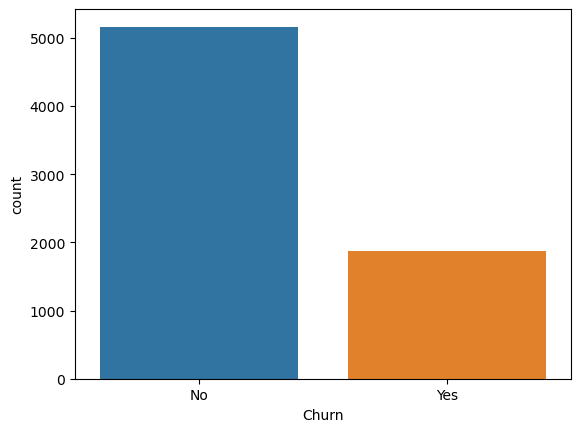

In [49]:
sns.countplot(data=df,x='Churn')
plt.savefig('figures/churn_countplot.jpg')

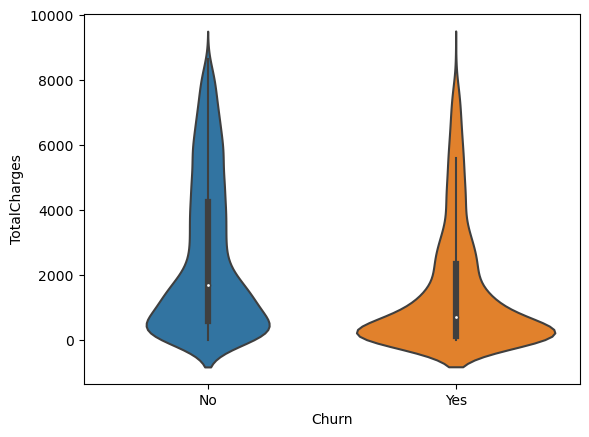

In [50]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')
plt.savefig('figures/churn_distrubution.jpg')

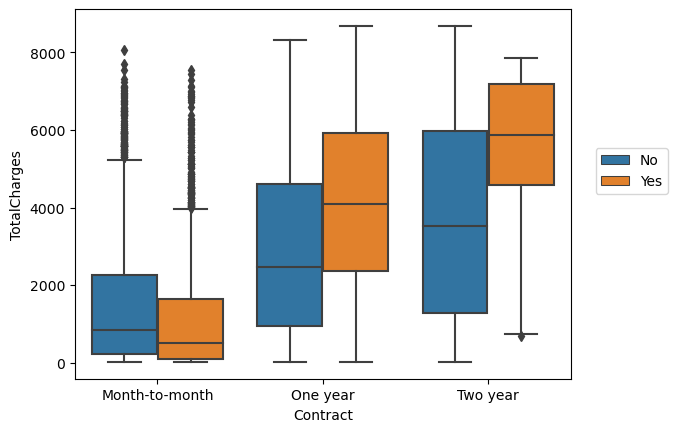

In [51]:
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')
plt.legend(loc=(1.05,0.5))
plt.savefig('figures/TotalCharges_VS_Contract_perCategory.jpg',bbox_inches='tight')

In [52]:
df_with_dummies = pd.get_dummies(df.drop('customerID',axis=1),drop_first=True)
df_with_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


In [53]:
corr_df = df_with_dummies.corr()

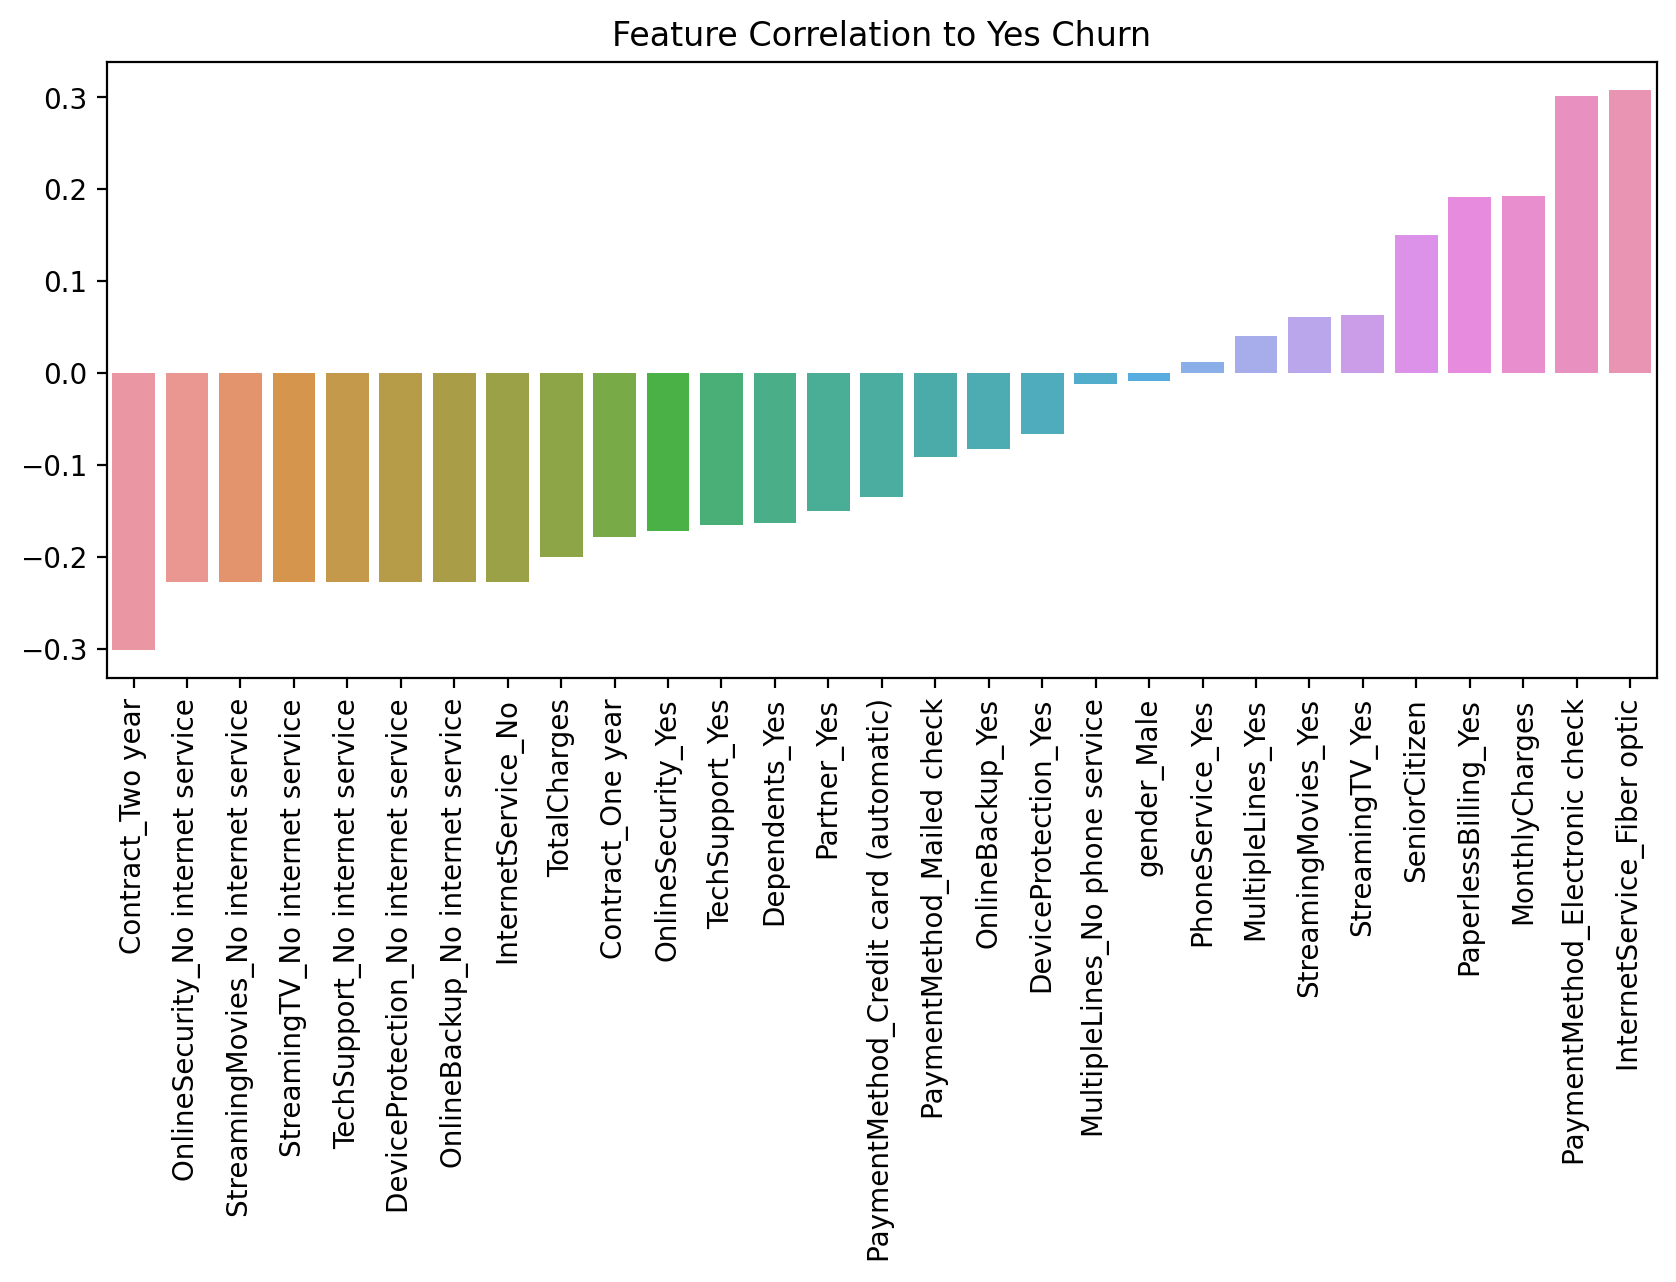

In [54]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);
plt.savefig('figures/FeatureCorrelation_Vs_YesChurn.jpg',bbox_inches='tight')

Cohort Analysis

In [55]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [56]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

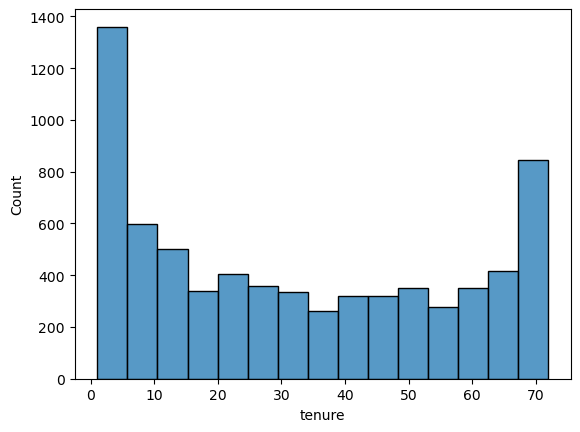

In [57]:
sns.histplot(data=df,x='tenure')
plt.savefig('figures/tenure_histplot.jpg')

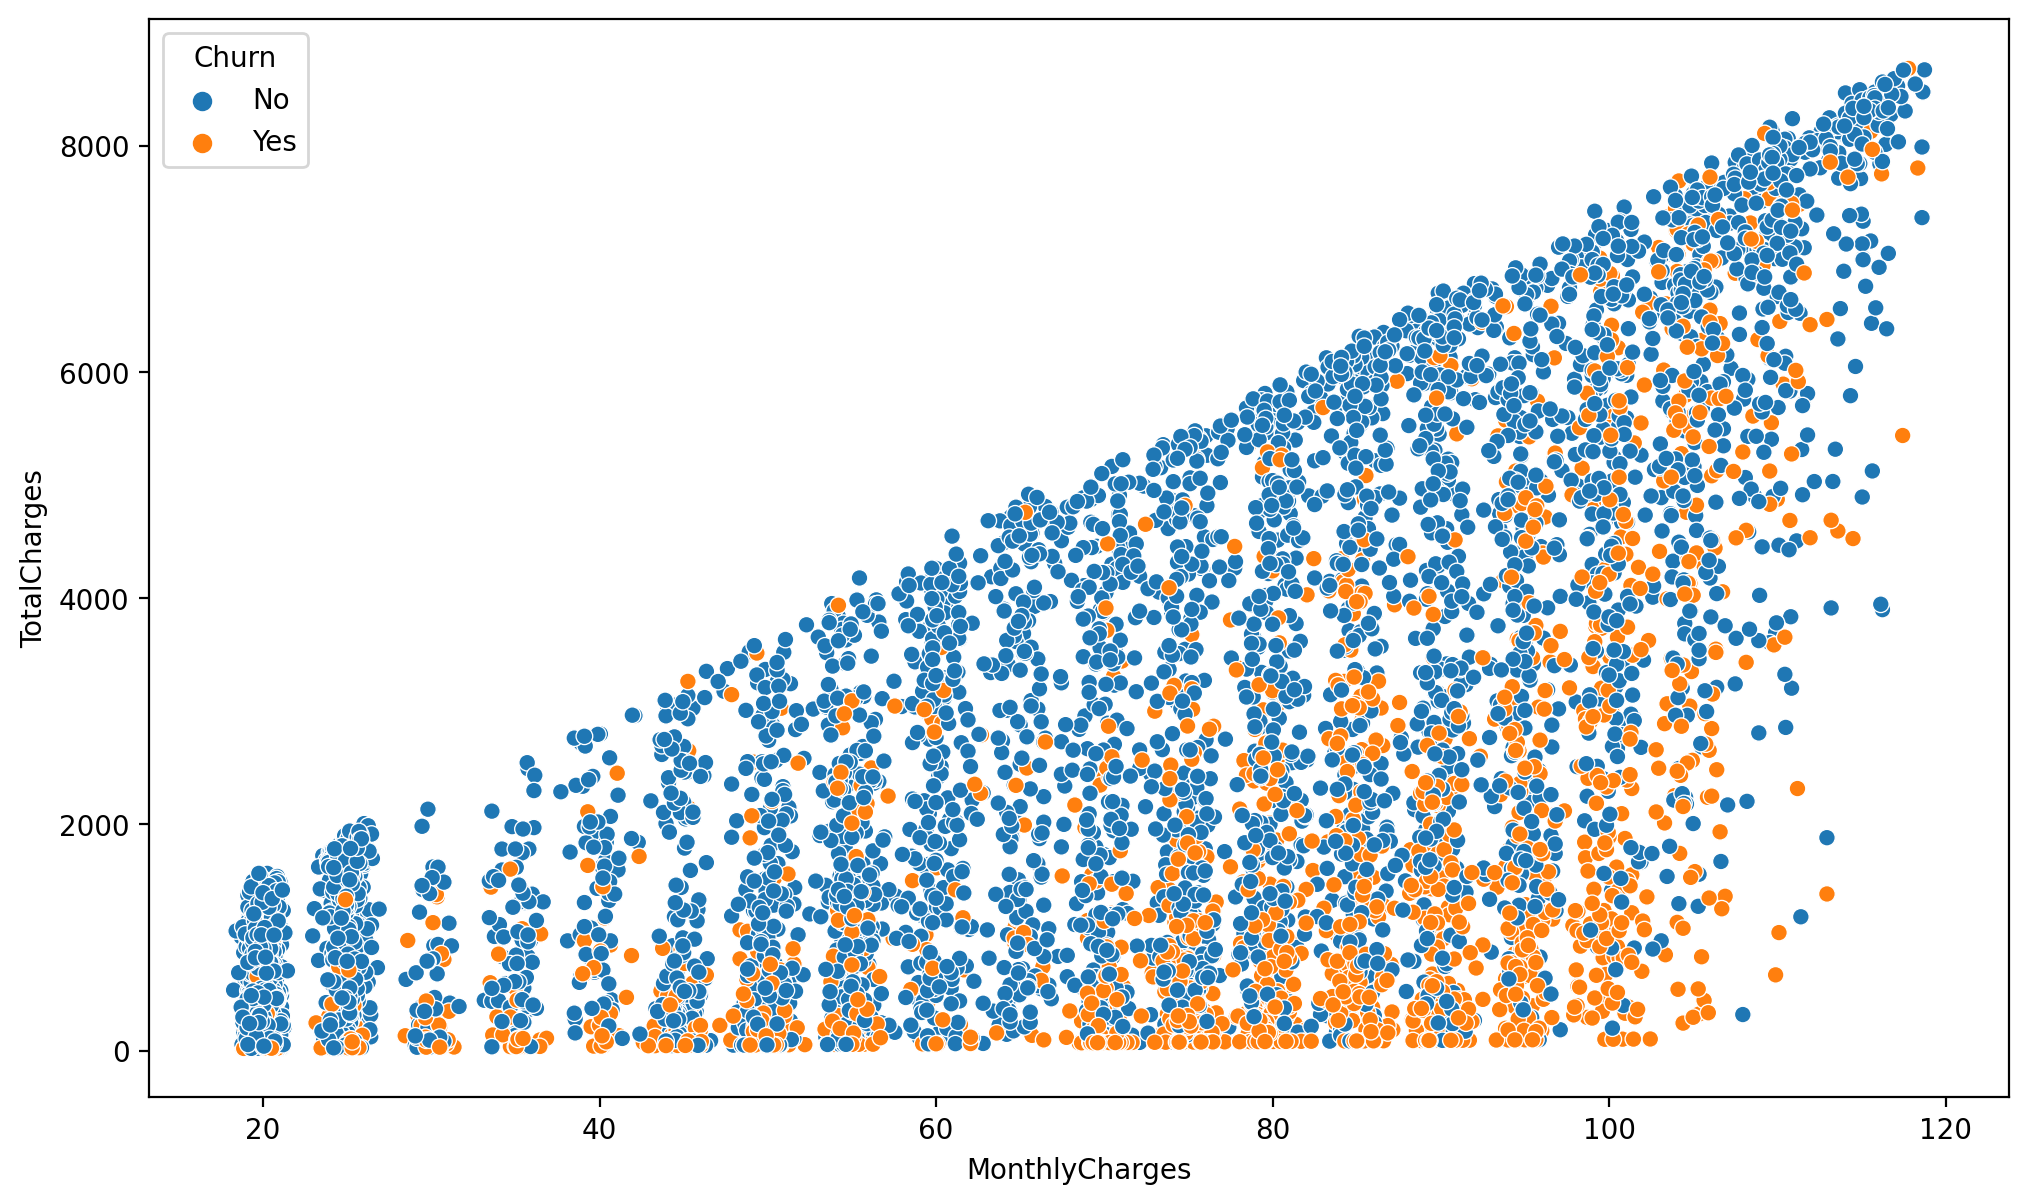

In [58]:
plt.figure(figsize=(12,7),dpi=200)
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Churn')
plt.savefig('figures/TotalCharges_VS_MonthlyCharges.jpg')

In [59]:
churn_yes_count = df_with_dummies[df_with_dummies['Churn_Yes']==1]
groups_of_tenure = churn_yes_count.groupby('tenure').count()
groups_of_tenure

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
tenure,,,,,,,,,,,,,,,,,,,,,
1,380,380,380,380,380,380,380,380,380,380,...,380,380,380,380,380,380,380,380,380,380
2,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
3,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
4,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
5,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
69,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
70,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [60]:
churn_percentage = (groups_of_tenure['Churn_Yes']/df_with_dummies.groupby('tenure').count()['Churn_Yes'])*100

In [61]:
churn_percentage

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn_Yes, Length: 72, dtype: float64

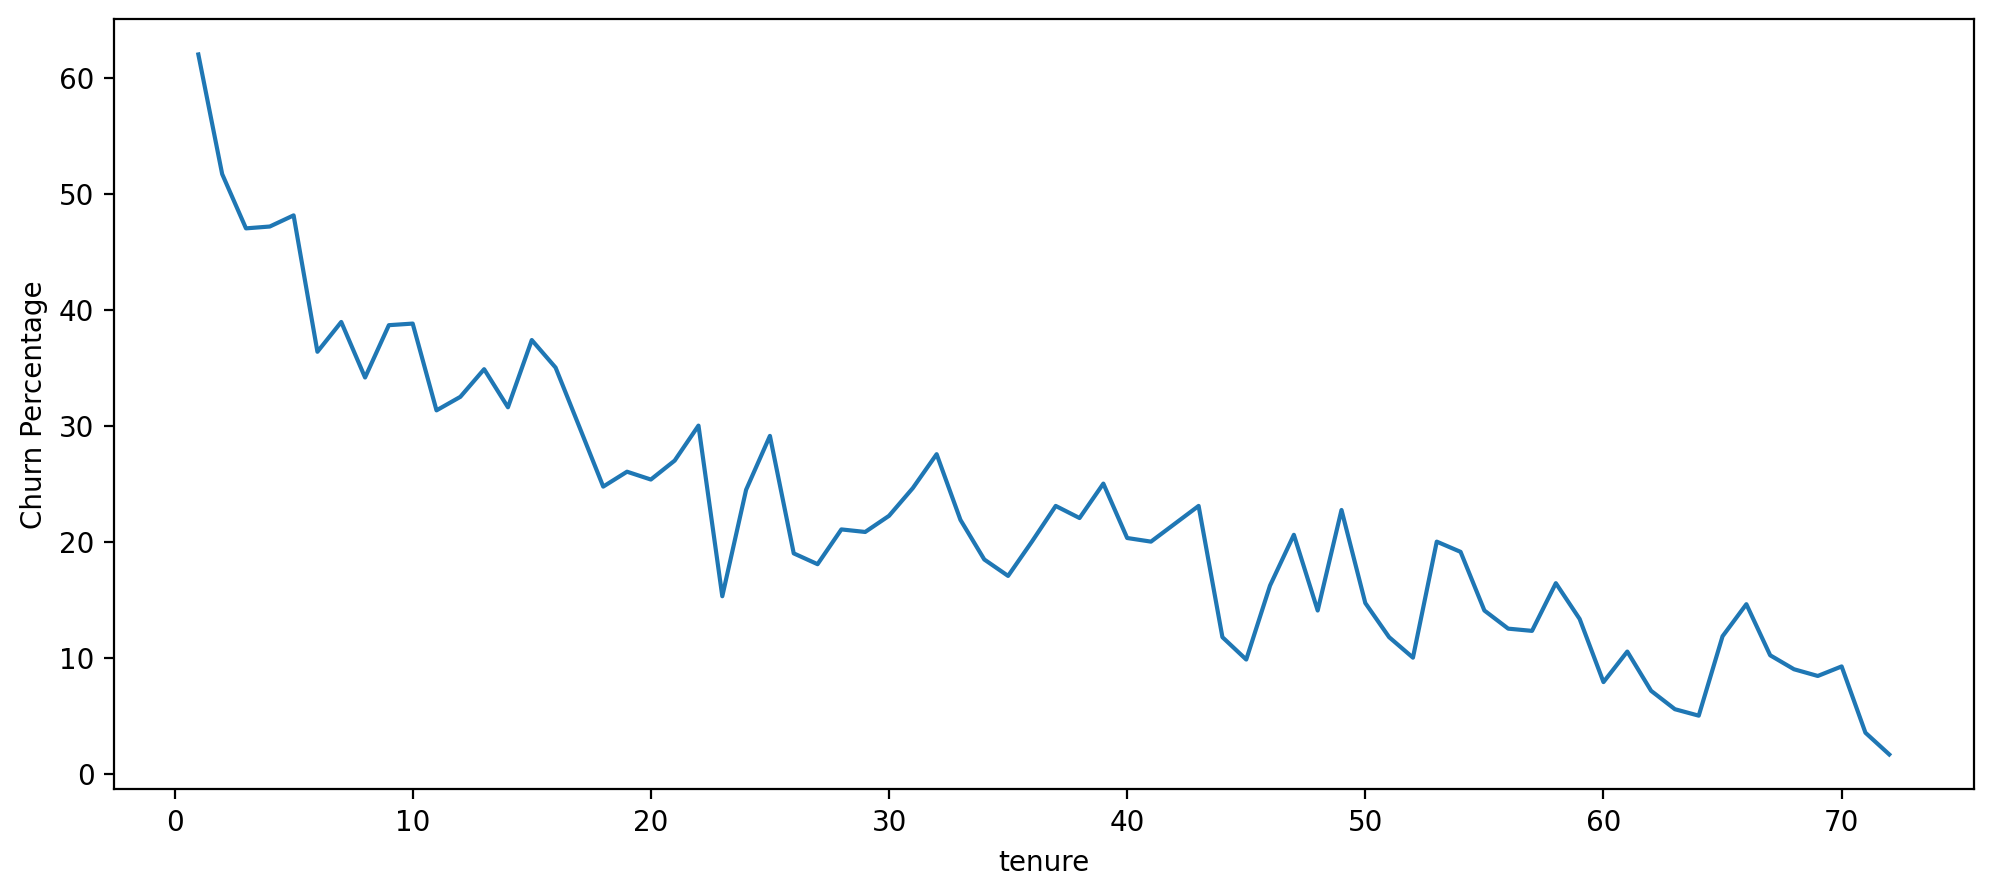

In [62]:
plt.figure(figsize=(12,5),dpi=200)
plt.plot(range(1,73),churn_percentage)
plt.xlabel('tenure')
plt.ylabel('Churn Percentage')
plt.savefig('figures/ChurnPercentage_VS_tenure.jpg')

In [63]:
def broader_Cohort(duration):
    if duration < 12:
        return '0-12 Months'
    elif duration < 24:
        return '12-24 Months'
    elif duration <48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [64]:
df['Tenure Cohort'] = df['tenure'].apply(broader_Cohort)

In [65]:
df[['tenure','Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


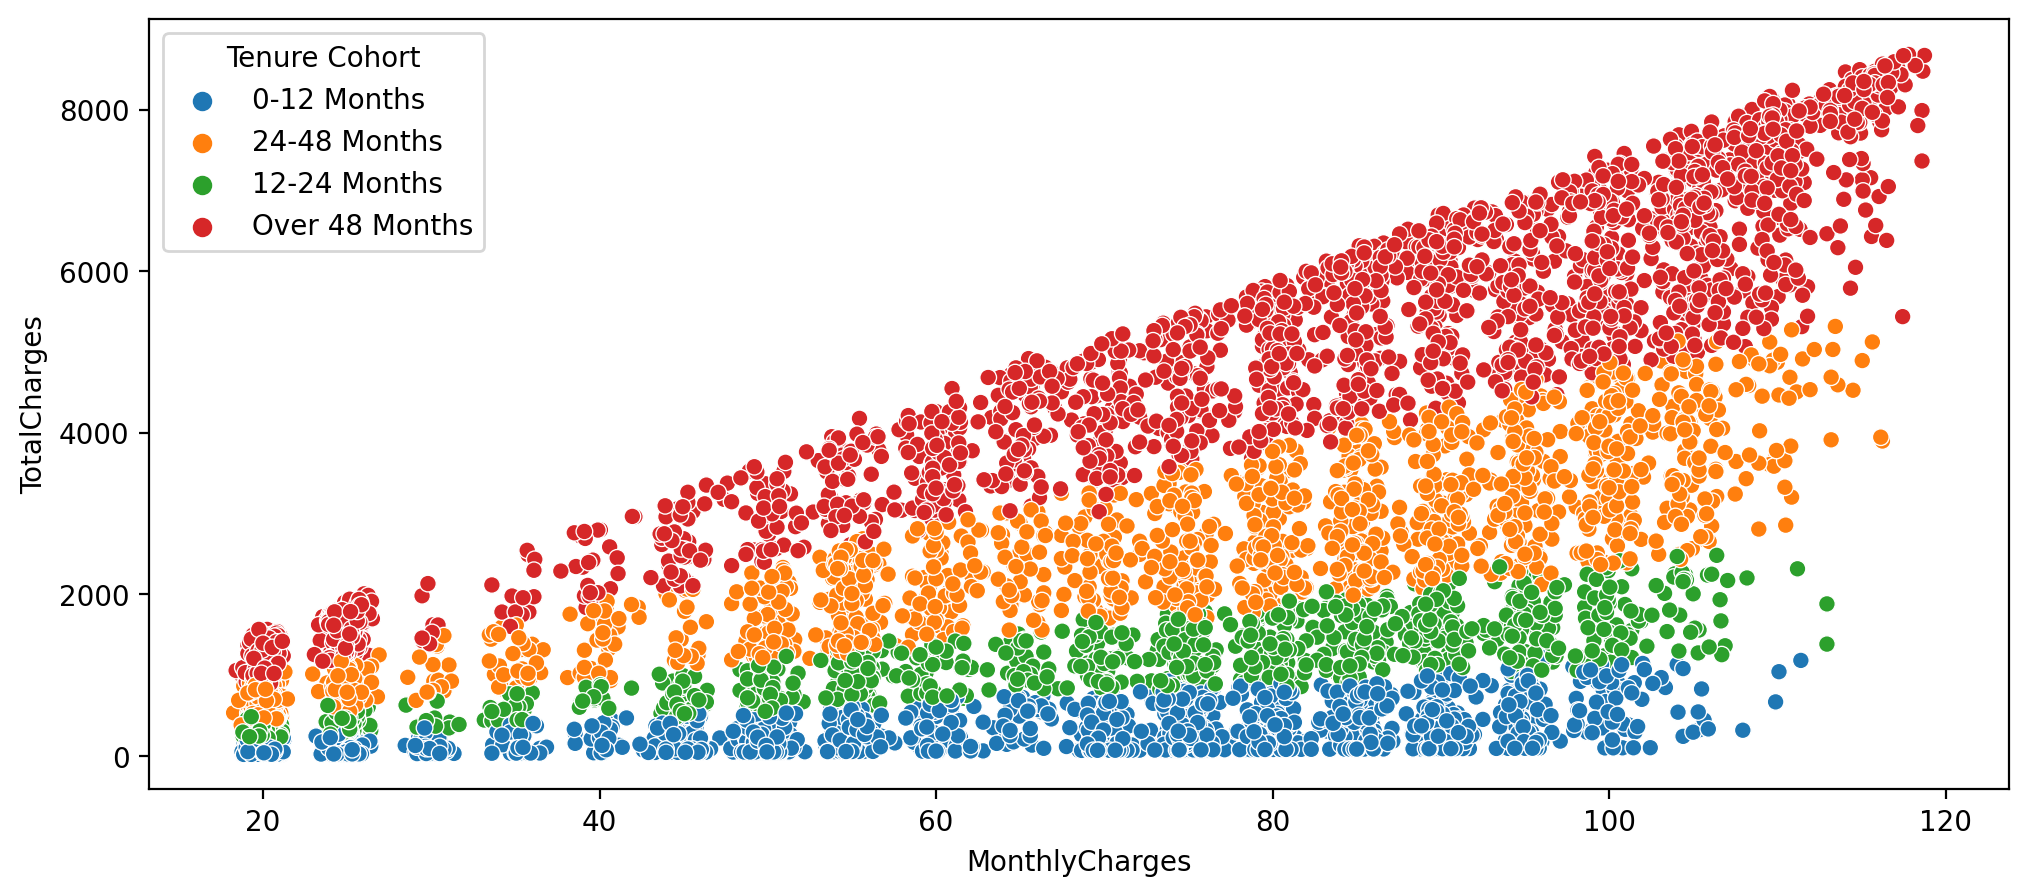

In [66]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Tenure Cohort')
plt.savefig('figures/Tenure Cohort.jpg')

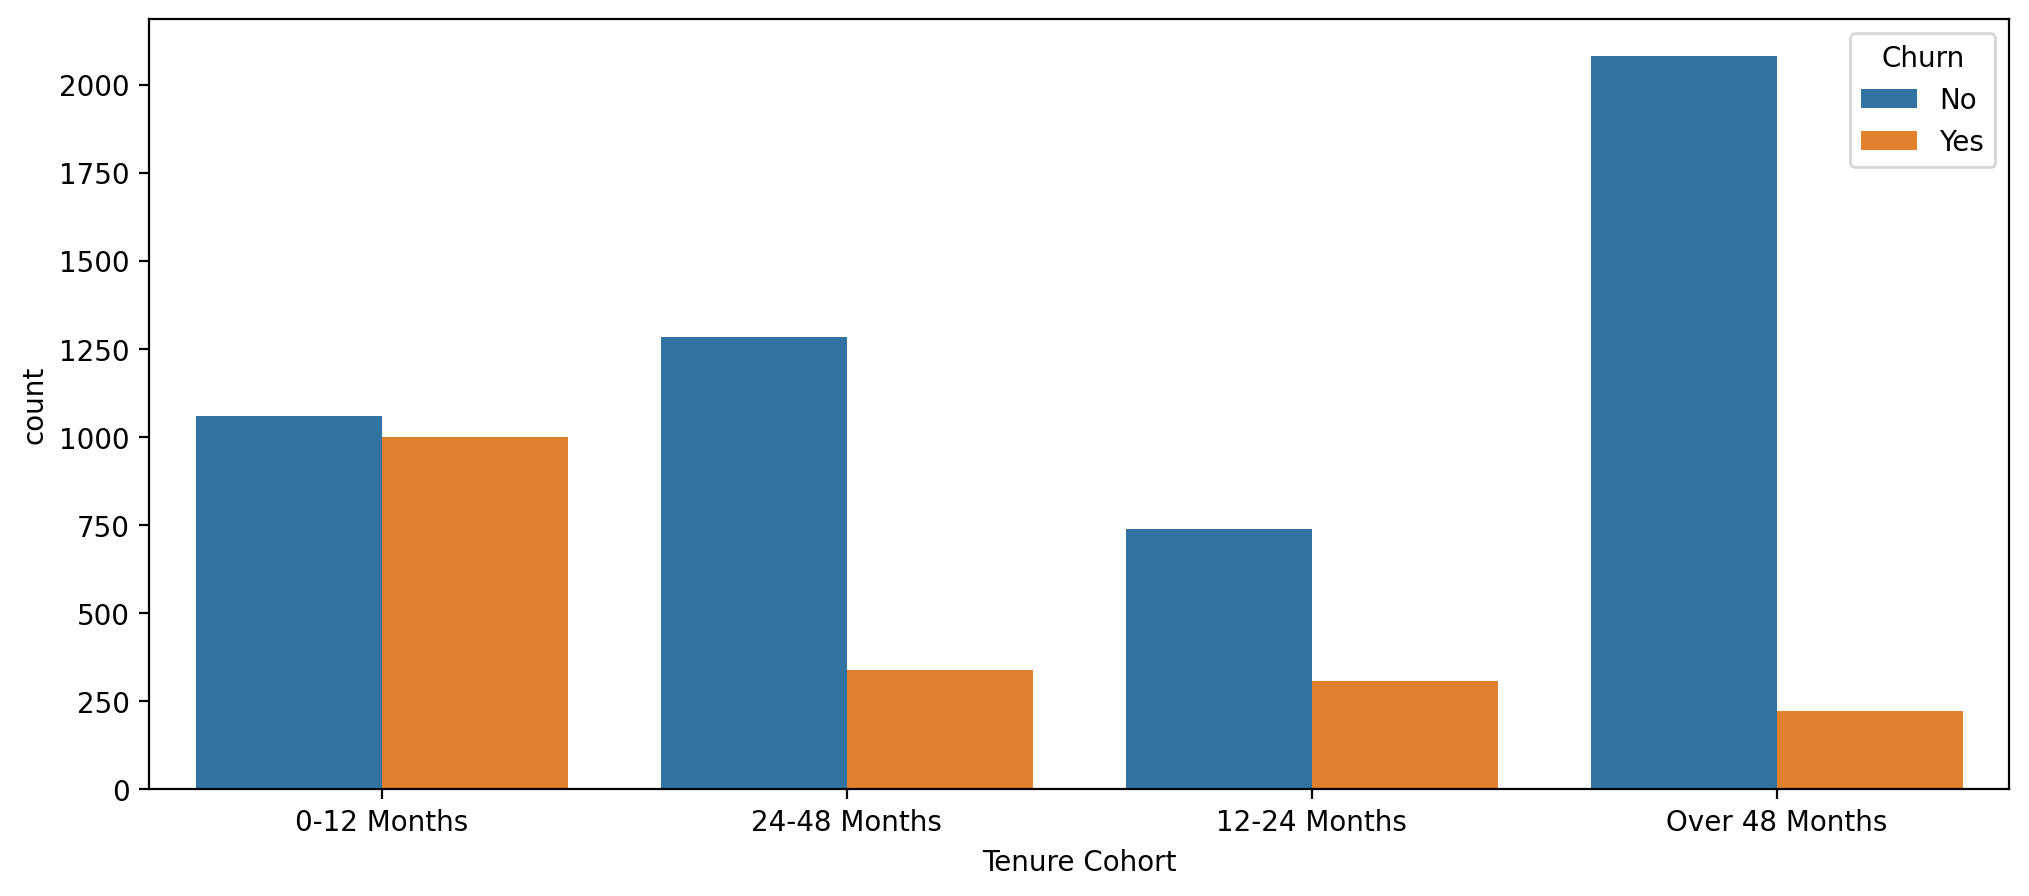

In [67]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')
plt.savefig('figures/Tenure Cohort Countplot.jpg')

Prediction Modelling

In [68]:
x = pd.get_dummies(df.drop(['Tenure Cohort','Churn','customerID'],axis=1),drop_first=True)
y = df['Churn']

In [69]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=101)

Single Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

single_tree_model = DecisionTreeClassifier()
param_grid = {'max_depth':[1,2,3,4,5,6]}
grid_model = GridSearchCV(single_tree_model,param_grid=param_grid)
grid_model.fit(x_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6]})

In [71]:
grid_model.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [72]:
grid_model.best_params_

{'max_depth': 5}

In [73]:
single_tree_model = DecisionTreeClassifier(max_depth=5)
single_tree_model.fit(x_train,y_train)
y_pred = single_tree_model.predict(x_test)

c:\Users\sai.nikhil.pillai\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


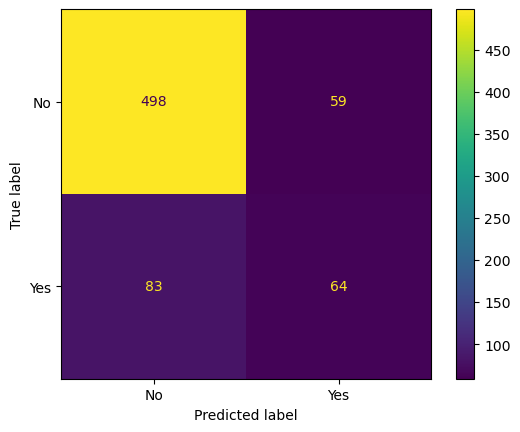

In [74]:
from sklearn.metrics import classification_report,plot_confusion_matrix

plot_confusion_matrix(single_tree_model,x_test,y_test)
plt.savefig('figures/decisionTree_matrix.jpg')

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



In [76]:
imp_feat = pd.DataFrame(index=x.columns,data=single_tree_model.feature_importances_,columns=['feature importnace']).sort_values('feature importnace')
imp_feat

,feature importnace
OnlineBackup_No internet service,0.000000
PaymentMethod_Credit card (automatic),0.000000
PaperlessBilling_Yes,0.000000
StreamingMovies_Yes,0.000000
StreamingMovies_No internet service,0.000000
StreamingTV_Yes,0.000000
StreamingTV_No internet service,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_Yes,0.000000
OnlineSecurity_No internet service,0.000000


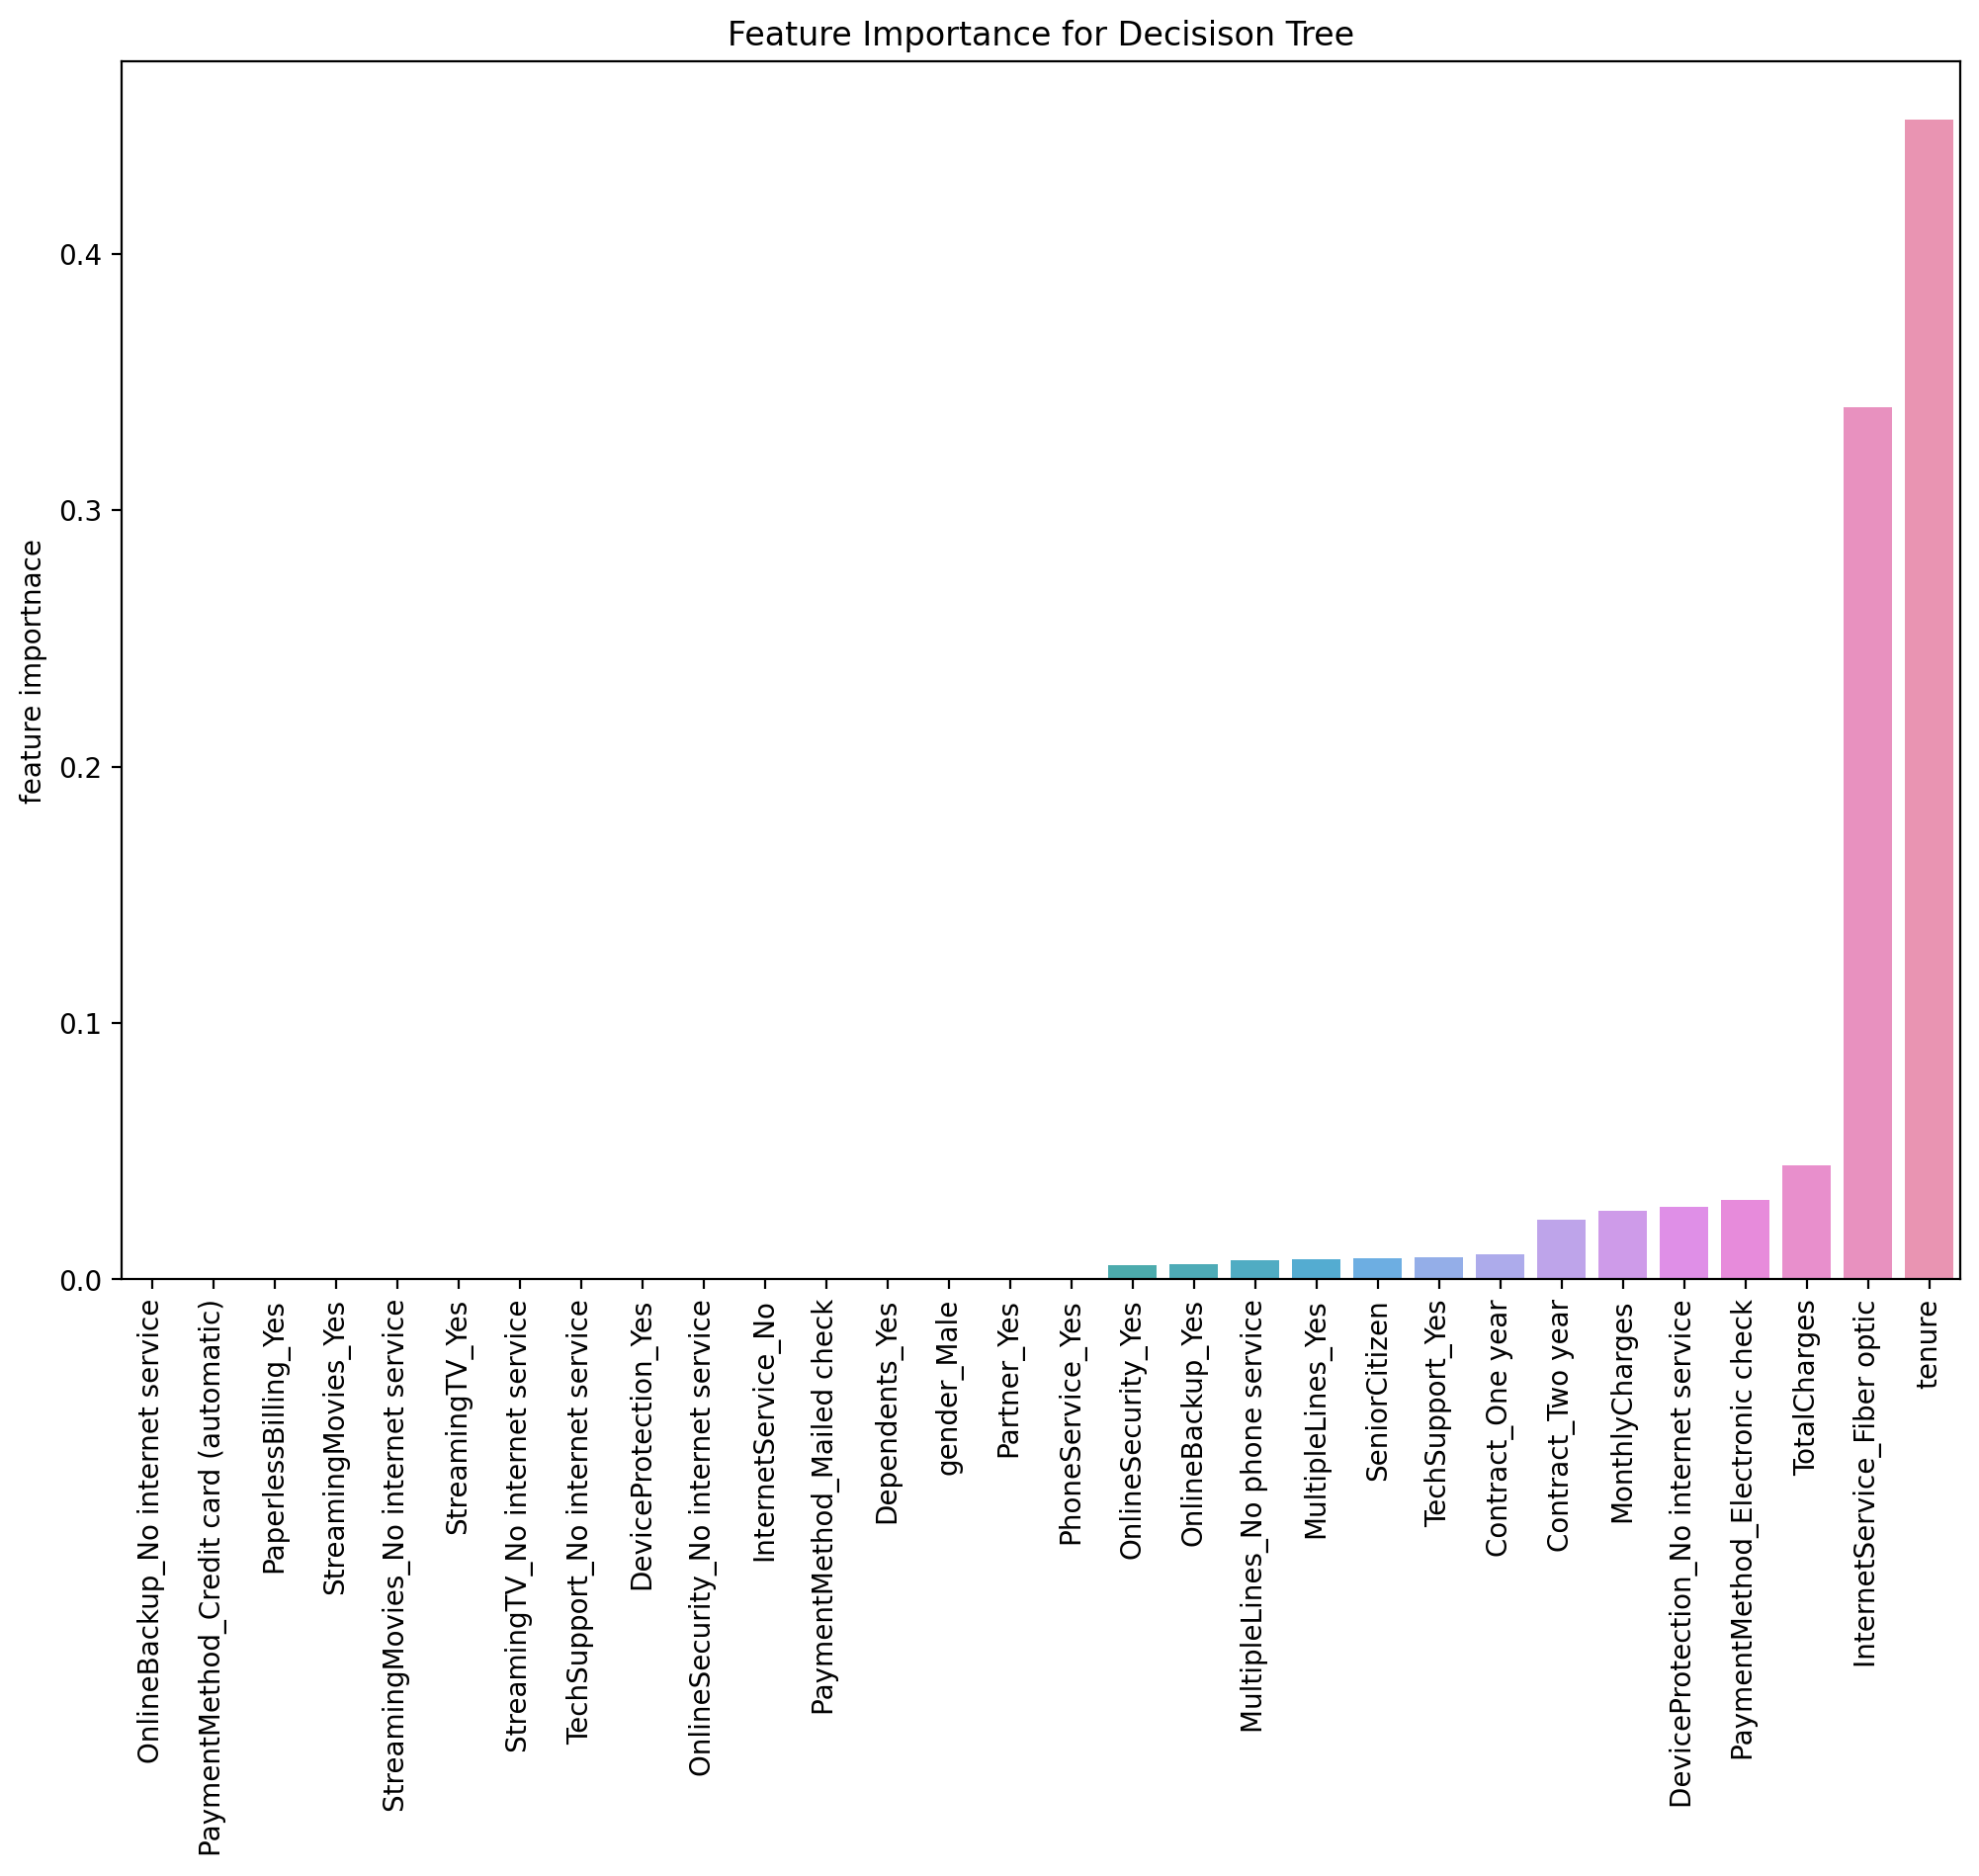

In [77]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=imp_feat,x=imp_feat.index,y='feature importnace')
plt.title('Feature Importance for Decisison Tree')
plt.xticks(rotation = 90);
plt.savefig('figures/Feature Imporatnce.jpg',bbox_inches='tight')

Random Forests

In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
n_estimators = range(2,35)
max_features = ['auto','sqrt','log2']
param_grid = {'n_estimators':n_estimators,'max_features':max_features}
grid_model = GridSearchCV(rfc,param_grid=param_grid)
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(2, 35)})

In [79]:
grid_model.best_estimator_

RandomForestClassifier(n_estimators=32)

In [80]:
grid_model.best_params_

{'max_features': 'auto', 'n_estimators': 32}

In [81]:
y_pred = grid_model.predict(x_test)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.85      0.90      0.88       557
         Yes       0.53      0.42      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



c:\Users\sai.nikhil.pillai\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


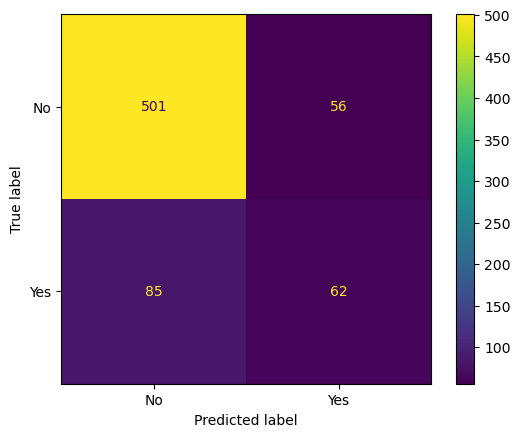

In [83]:
plot_confusion_matrix(grid_model,x_test,y_test)
plt.savefig('figures/rfcmatrix.jpg')